# Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from lab_ML_supervised import rand_gauss, rand_bi_gauss, rand_clown, rand_checkers, grid_2d, plot_2d, frontiere, mse_loss, gradient, plot_gradient, poly2, collist,\
    symlist, gr_mse_loss, hinge_loss, gr_hinge_loss

In [144]:
import plotly
py=plotly.offline
go =plotly.graph_objs
plotly.offline.init_notebook_mode()

def histogram(data,title,dataName,Y_name=[""]):
    trace= []
    if Y_name ==[""]:
        Y_name = [""]*len(data);
        
    for i in range(0,len(data)):
        histo = go.Histogram(
            x=data[i],
            histnorm='probability',
            opacity=0.5,
            #xbins=dict(start=min(data[i])-0.25, size= 5, end= max(data[i])+0.25),
            name=Y_name[i]
        )
        trace.append(histo)
    layout = go.Layout(
    title=title,
    xaxis=dict(
        title=dataName
    ),
    yaxis=dict(
        title='Count'
    ),
    barmode='stack',
    bargap=0,
    bargroupgap=0
    )
    fig = go.Figure(data=trace, layout=layout)
    #py.plot(fig, filename='histogram/histogramIsBooking'+data_name+'Histogram.html')
    py.iplot(fig)
    
def scatter(Y,Y_name,title,X_name,X=None):
    """
    Y : list of data to plot
    Y_name : list of name of data to plot -> Y axis
    title : title of the plot
    X_name : list of name -> X axis
    X : by default [0,1,...,len(Y)]
    """
    if X == None :
        X = [ x for x in range(0,len(Y[0]))];
    data = []
    for i in range(0,len(Y)):
        data.append(go.Scatter(
        x=X,
        y=Y[i],
        mode = 'markers',
        name = Y_name[i]
    ))
    layout = go.Layout(
        title=title,
        xaxis=dict(
            title=X_name,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='value',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    
    fig = go.Figure(data=data, layout=layout)
    #py.plot(fig, filename='repo/name.html')
    py.iplot(fig)

# 1 Introduction 

## Data Generation : 

### rand_gauss(n,mu,sigma) : 

This function generate a sample of size n from a Gaussian variable with center mu and std deviation sigma.  
mu and sigma are lists which must have the same size. This size defined the dimension of the random Gaussian variable that will be sampled.


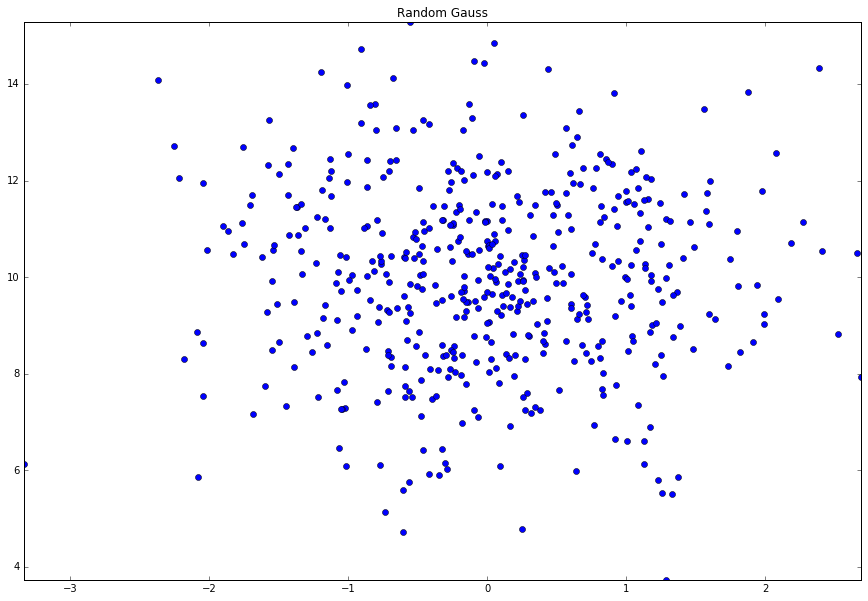

In [2]:
mu = [0,10]
sigma = [1,2]
numberOfPoints = 500
YGauss = rand_gauss(numberOfPoints,mu,sigma)
#Y_name = ["(mu,sigma) = (" + str(mu[i]) + "," +str(sigma[i])+")" for i in range(Y.shape[1])]
#scatter([Y[:,i] for i in range(Y.shape[1])],Y_name,"Random gaussian variables","time")
#scatter([Y[:,1] ],Y_name,"Random gaussian variables","time",Y[:,0])
plt.figure(1, figsize=(15, 10))
plt.title("Random Gauss")
plot_2d(YGauss)
plt.show()

### rand_bi_gauss(n1,n2,mu1,mu2,sigma1,sigma2) : 

This function generate two samples of size n1 + n2 from Gaussian variables with respectively center mu1,mu2 and std deviation sigma1, sigma2.  
mu1,mu2 and sigma1,sigma2 are lists which must have the same size. This size defined the dimension of the random Gaussian variable that will be sampled.

The random variable generated is a random shuffle of the two Gaussian variables generated from (n1, mu1, sigma1) and (n2, mu2, sigma2).


/home/fischmaa/Documents/3A/MachineLearningFundamentals/TP/Lab1/lab_ML_supervised.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (y!=None):


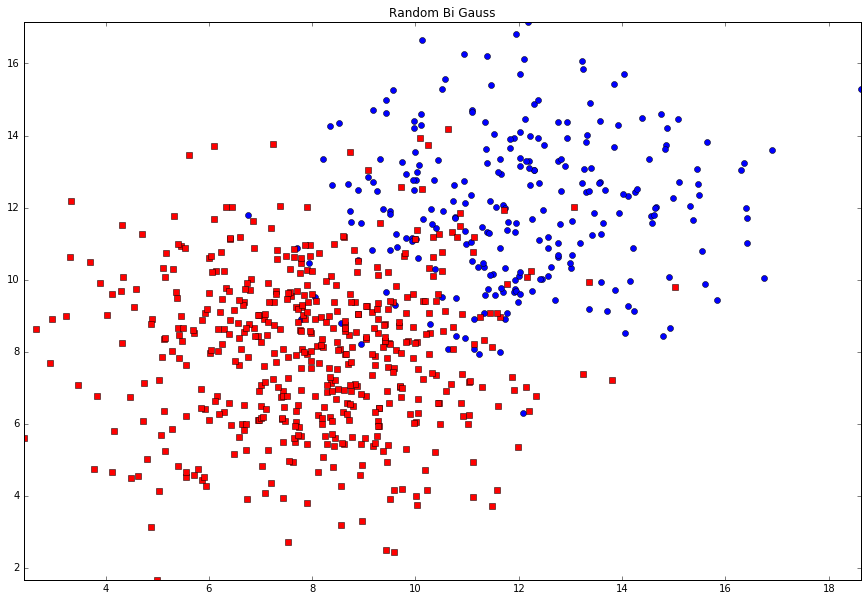

In [3]:
n1=500
n2=250
mu1=[8,8]
mu2=[12,12]
sigma1=[2,2]
sigma2=[2,2]
YBiGauss=rand_bi_gauss(n1,n2,mu1,mu2,sigma1,sigma2)
#Y_name = ["(mu1, mu2, sigma1, sigma2) = (" + str(mu1[i]) + "," + str(mu2[i]) + "," +str(sigma1[i])+","+str(sigma2[i])+")" for i in range(Y.shape[1]-1)]
#scatter([Y[:,i] for i in range(Y.shape[1]-1)],Y_name,"Random bi-gaussian variables","time")
plt.figure(1, figsize=(15, 10))
plt.title("Random Bi Gauss")
plot_2d(YBiGauss,YBiGauss[:,-1])
plt.show()

### rand_clown(n1,n2,std1,std2) : 

This function generate two samples of size n1 + n2.  
* The first sample  is of two random vectors (randomly shuffled) : one (size n1) X0 is a gaussian variable with center 0 and standard deviation 1 ; the other one (size n1) is a gaussian variable with center the square of the previous vector X0 plus a noise ( gaussian variable with center 0 and standard deviation std1).  
* The second sample is of two random vectors (randomly shuffled) : one (size n2) is a gaussian variable with center 0 and standard deviation std2  ; the other one (size n2) is a gaussian variable with center 2 and a standard deviation std2.  


/home/fischmaa/Documents/3A/MachineLearningFundamentals/TP/Lab1/lab_ML_supervised.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (y!=None):


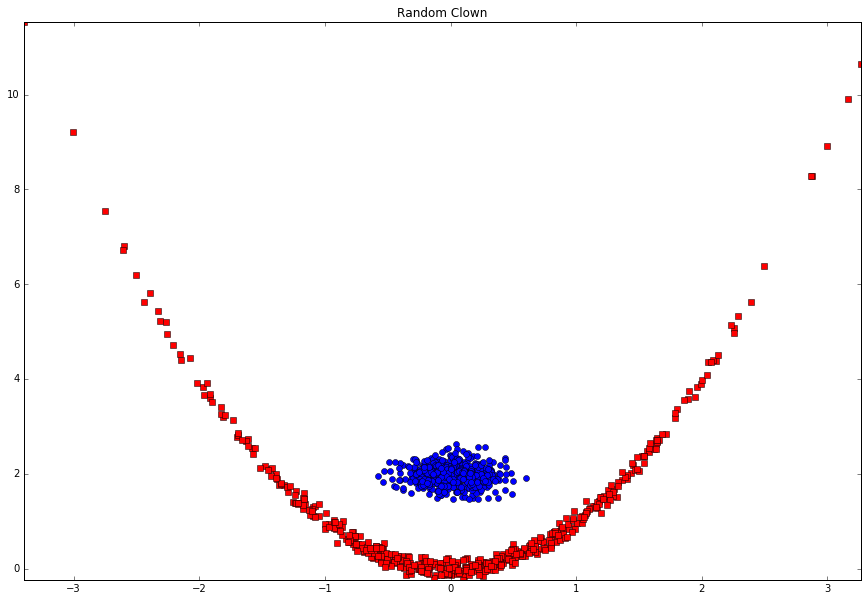

In [4]:
n1, n2, std1, std2 =500,500,0.1,0.2;
YClown=rand_clown(n1,n2,std1,std2)
#Y_name = ["First sample","Second sample"]
#scatter([Y[:,i] for i in range(2)],Y_name,"Random clown variables","time")
plt.figure(1, figsize=(15, 10))
plt.title("Random Clown")
plot_2d(YClown,YClown[:,-1])
plt.show()

### rand checkers(n1,n2,epsilon) : 

This function generate two samples of size (floor(n1/8) + floor(n2/8))*8.   
TO DO : 
* The first sample -> slow mean variation
* The second sample -> fast mean variaton


/home/fischmaa/Documents/3A/MachineLearningFundamentals/TP/Lab1/lab_ML_supervised.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (y!=None):


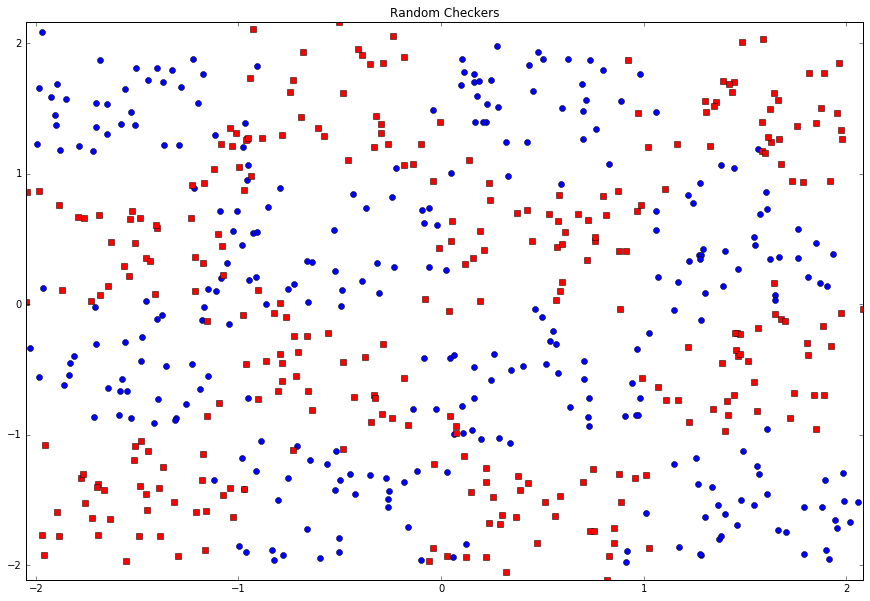

In [5]:
YCheckers=rand_checkers(300,300,0.1)
#Y_name = ["slow sample","fast sample"]
#scatter([Y[:,i] for i in range(2)],Y_name,"Random checkers variables","time")
plt.figure(1, figsize=(15, 10))
plt.title("Random Checkers")
plot_2d(YCheckers,YCheckers[:,-1])
plt.show()

# 2. Logistic Regression 

In [6]:
from sklearn import linear_model

**fit attributes**:	
* coef_ : array, shape (n_classes, n_features)  
Coefficient of the features in the decision function.  
  
  
* intercept_ : array, shape (n_classes,)  
Intercept (a.k.a. bias) added to the decision function. If fit_intercept is set to False, the intercept is set to zero.


* n_iter_ : array, shape (n_classes,) or (1, )  
Actual number of iterations for all classes. If binary or multinomial, it returns only 1 element. For liblinear solver, only the maximum number of iteration across all classes is given.  

**function predict(X)** : Predict class labels for samples in X.  

**function score(X, y, sample_weight=None)** : Returns the mean accuracy on the given test data X and true labels y.


In [53]:
my_log = linear_model.LogisticRegression()
my_fit = my_log.fit(YClown[:,:2],YClown[:,-1])

In [77]:
def logisticRegression(dataX,dataY) :
        
        ##################################################################################################
        #                        Fit the logistic regression to all the data given                       #
        ##################################################################################################
        my_log = linear_model.LogisticRegression()
        my_fit = my_log.fit(dataX,dataY)
        print(my_fit)
        print("Fit result : \ncoef :",fit.coef_,";\nintercept :",fit.intercept_,";\nn_iter :",fit.n_iter_)
        print("Function score on training set:",my_fit.score(dataX,dataY))
        
        ###################################################################################################
        #                                 Plot the decision boundary                                      #
        ###################################################################################################
        # grid design with meshgrid
        xx,yy=grid_2d(dataX,1000)
        Z = my_log.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Put the result into a color plot
        plt.figure(1, figsize=(15, 10))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(dataX[:, 0], dataX[:, 1], c=dataY, cmap=plt.cm.Paired)
        plt.xlabel('X')
        plt.ylabel('Y')

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("Logistic Regression")

        plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Fit result : 
coef : [[ 0.13611085 -0.68836549]] ;
intercept : [ 1.04531133] ;
n_iter : [4]
Function score on training set: 0.858


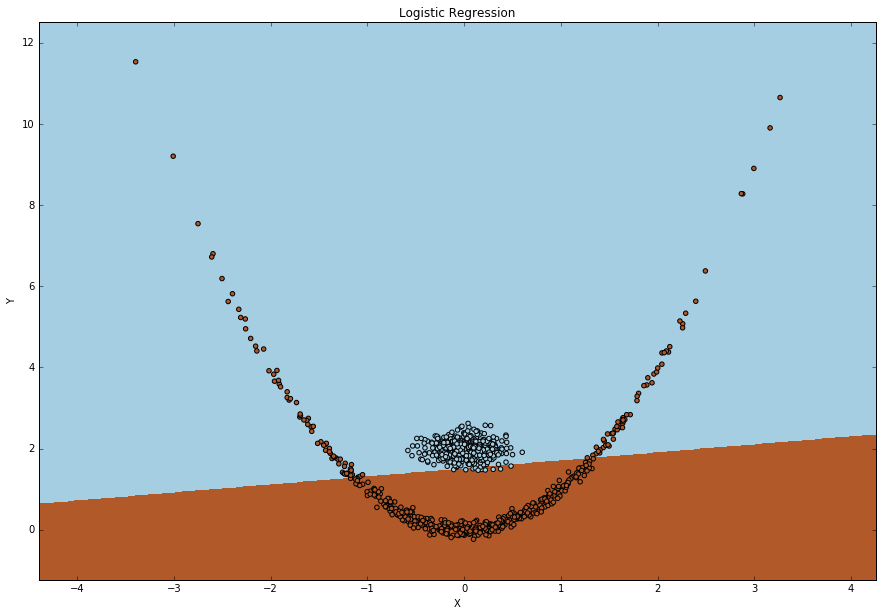

In [78]:
logisticRegression(YClown[:,:2],YClown[:,-1])

**Zipcode dataset** : http://www-stat.stanford.edu/ElemStatLearn  

Application of the Logistic Regression algorithm.

In [79]:
import pandas as pd

In [103]:
#Read the training set.
zipTrain = np.array(pd.read_csv("./zip.train",header=None,sep=' ',usecols=np.arange(257)))
zipTrain.shape

(7291, 257)

In [133]:
#Train the model
my_log = linear_model.LogisticRegression()
my_fit = my_log.fit(zipTrain[:,1:],zipTrain[:,0])

In [134]:
#Score on the training set
my_fit.score(zipTrain[:,1:],zipTrain[:,0])

0.98011246742559321

In [116]:
#Read the test set.
zipTest = np.array(pd.read_csv("./zip.test",header=None,sep=' ',usecols=np.arange(257)))
zipTest.shape

(2007, 257)

In [139]:
my_fit.score(zipTest[:,1:],zipTest[:,0])

0.91131041355256603

# 3. Perceptron

## Classical perceptron : 

The boundary of the perceptron is the line generated by the vector $w$ that minimizes the objective function : 
$$ 
\hat{L}(w) = -\sum_{i \ in I}{}y_{i}(\langle w,x_{i}\rangle + w_{0})
$$
$\hat{f_{w}}(x)$ is large when the observation x is far away from the decision boundary.  
It is positive when the predicted label is +1 and negative when the predicted label is -1.


In [188]:
epsilon=0.01
niter=75

dataX=YBiGauss[:,:2]
dataY=YBiGauss[:,2]

#w_ini: intial guess for the hyperplan
w_ini=np.zeros([niter,dataX.shape[1]+1])
std_ini=1
for i in range(dataX.shape[1]+1):
	w_ini[-1,-i+1]=std_ini*np.random.randn(1,1)
	print( w_ini[-1,-i+1])

-1.34498281773
-0.932403224505
-0.320405011499


In [186]:
lfun=mse_loss
gr_lfun=gr_mse_loss


plt.figure(7)
wh,costh=gradient(dataX,dataY,epsilon,niter,w_ini,lfun,gr_lfun,stoch=False)

/home/fischmaa/Documents/3A/MachineLearningFundamentals/TP/Lab1/lab_ML_supervised.py:110: FutureWarning:

comparison to `None` will result in an elementwise object comparison in the future.

/home/fischmaa/Documents/3A/MachineLearningFundamentals/TP/Lab1/lab_ML_supervised.py:131: FutureWarning:

comparison to `None` will result in an elementwise object comparison in the future.

/home/fischmaa/Documents/3A/MachineLearningFundamentals/TP/Lab1/lab_ML_supervised.py:179: FutureWarning:

comparison to `None` will result in an elementwise object comparison in the future.



ValueError: zero-size array to reduction operation maximum which has no identity

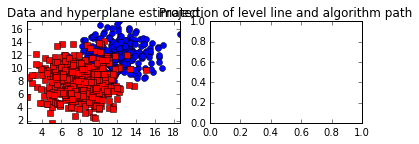

In [189]:
plot_gradient(dataX,dataY,wh,costh,lfun)
plt.suptitle('MSE and batch')
plt.show()

-0.0772379782785
0.264858413622
-1.34117521286


/home/fischmaa/Documents/3A/MachineLearningFundamentals/TP/Lab1/lab_ML_supervised.py:110: FutureWarning:

comparison to `None` will result in an elementwise object comparison in the future.

/home/fischmaa/Documents/3A/MachineLearningFundamentals/TP/Lab1/lab_ML_supervised.py:131: FutureWarning:

comparison to `None` will result in an elementwise object comparison in the future.

/home/fischmaa/Documents/3A/MachineLearningFundamentals/TP/Lab1/lab_ML_supervised.py:179: FutureWarning:

comparison to `None` will result in an elementwise object comparison in the future.



ValueError: zero-size array to reduction operation minimum which has no identity

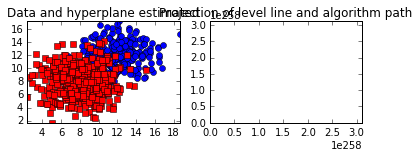

In [174]:
wh,costh=gradient(dataX,dataY,epsilon,niter,w_ini,lfun,gr_lfun,stoch=False)
plot_gradient(dataX,dataY,wh,costh,lfun)
plt.suptitle('MSE and batch')
plt.show()


epsilon=0.001
plt.figure(8)
plt.suptitle('MSE and stochastic')
wh_sto,costh_sto=gradient(dataX,dataY,epsilon,niter,w_ini,lfun,gr_lfun,
						stoch=True)
plot_gradient(dataX,dataY,wh_sto,costh_sto,lfun)
plt.show()

/home/fischmaa/Documents/3A/MachineLearningFundamentals/TP/Lab1/lab_ML_supervised.py:110: FutureWarning:

comparison to `None` will result in an elementwise object comparison in the future.



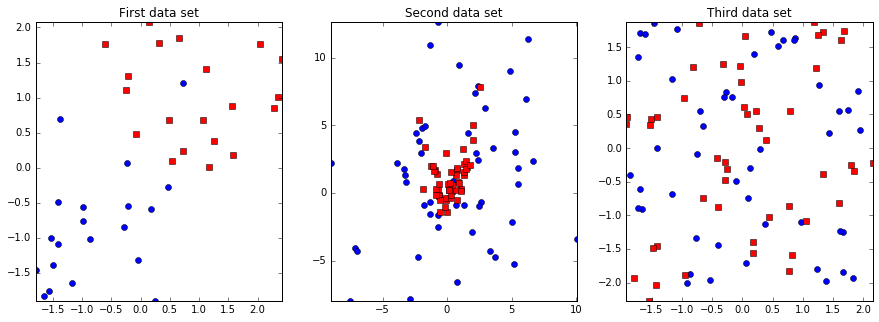

LDA results:
             precision    recall  f1-score   support

       -1.0       1.00      0.95      0.97        20
        1.0       0.95      1.00      0.98        20

avg / total       0.98      0.97      0.97        40



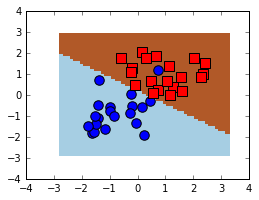

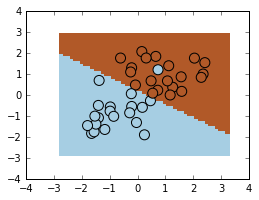

In [196]:
############################################################################
########            Data Generation: example                        ########
############################################################################

n=100
mu=[1,1]
sigma=[1,1]
rand_gauss(n,mu,sigma)

n1=20
n2=20
mu1=[1,1]
mu2=[-1,-1]
sigma1=[0.9,0.9]
sigma2=[0.9,0.9]
data1=rand_bi_gauss(n1,n2,mu1,mu2,sigma1,sigma2)

std1=1
std2=5
n1=50
n2=50
data2=rand_clown(n1,n2,std1,std2)


std=0.1
data3=rand_checkers(n1,n2,std)
dataX=data1[:,:2]
dataY=data1[:,2]





############################################################################
########            Displaying labeled data                         ########
############################################################################
plt.close("all")

plt.figure(1, figsize=(15,5))
plt.subplot(131)
plt.title('First data set')
plot_2d(data1[:,:2],data1[:,2],w=None)

plt.subplot(132)
plt.title('Second data set')
plot_2d(data2[:,:2],data2[:,2],w=None)

plt.subplot(133)
plt.title('Third data set')
plot_2d(data3[:,:2],data3[:,2],w=None)
plt.show()


############################################################################
########           Linear discriminant analysis (LDA)               ########
############################################################################

from sklearn.lda import LDA
from sklearn import metrics

lda = LDA()
lda.fit(dataX,dataY)
lda.coef_
lda.intercept_


print ("LDA results:")
print (metrics.classification_report(dataY, lda.predict(dataX)))


#meshgrid creation for visualization
xx,yy=grid_2d(dataX,50)
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the result into a color plot, first solution


plt.figure(2, figsize=(4,3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
labs=np.unique(dataY)
idxbyclass=[ np.where(dataY==labs[i])[0] for i in range(len(labs))]
for i in range(len(labs)):
	plt.scatter(dataX[idxbyclass[i],0],dataX[idxbyclass[i],1],
			color=collist[i%len(collist)],cmap=plt.cm.Paired,
			marker=symlist[i%len(symlist)],s=90,edgecolors='k')

# Display the result into a color plot, second solution
plt.figure(3, figsize=(4,3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(dataX[:, 0], dataX[:, 1], c=dataY, edgecolors='k',
				cmap=plt.cm.Paired, s=100)
plt.show()